In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import geopandas

setName = "Linear_real"
write_fig = True
if write_fig:
    print("Write figure: " + "\033[1;32mTrue\033[0m")
else:
    print("Write figure: " + "\033[1;31mFalse\033[0m")

Write figure: True


### Set 1 only (Spacial deviation, parallel method)

In [ ]:
result_df_list = []
for mobile_mode in ["Fix", "Mob"]:
    for k in range(1, 2):
        for k2 in range(1, 2):
            part_df = pd.read_csv(f"./{mobile_mode}_Set1+_{setName}_{k}_{k2}.csv")
            part_df["k"] = [k for i in range(len(part_df))]
            part_df["k2"] = [k2 for i in range(len(part_df))]
            part_df["mobile_mode"] = [mobile_mode for i in range(len(part_df))]
            result_df_list.append(part_df)

result_df_all = pd.concat(result_df_list).reset_index(drop = True)
result_df_all
# result_df_all = result_df_all["FI_spac", "FI_temp", "k", "mobile_mode", "worst_case", "nominal_case"].groupby(["FI_spac", "FI_temp", "k", "mobile_mode"]).agg({"worst_case": "mean", "nominal_case": "mean"})

,FI_spac,FI_temp,worst_case,nominal_case,large_modules,small_modules,worst_decision,k,k2,mobile_mode
0,0.0,0.0,98952.000723,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
1,0.0,0.1,99678.247128,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
2,0.0,0.2,100074.603927,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
3,0.0,0.3,100003.699177,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
4,0.0,0.4,100003.699177,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
...,...,...,...,...,...,...,...,...,...,...
237,1.0,0.6,99197.480407,91402.301792,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Mob
238,1.0,0.7,99197.480407,91402.301792,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Mob
239,1.0,0.8,99167.924927,91402.301792,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Mob
240,1.0,0.9,99167.924927,91402.301792,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Mob


In [3]:
result_df_all.query("FI_temp == 0.3")

,FI_spac,FI_temp,worst_case,nominal_case,large_modules,small_modules,worst_decision,k,k2,mobile_mode
3,0.0,0.3,100003.699177,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
14,0.1,0.3,100604.020203,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
25,0.2,0.3,102113.269569,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
36,0.3,0.3,102902.782104,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
47,0.4,0.3,103786.614267,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
58,0.5,0.3,104197.808263,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
69,0.6,0.3,104585.174567,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
80,0.7,0.3,104609.551147,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
91,0.8,0.3,102253.134866,94292.623792,3.0,4.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix
102,0.9,0.3,104624.634054,91925.747961,3.0,3.0,"Y[i = 1, l = 1, t = 1]: 1.00; Y[i = 1, l = 1, ...",1,1,Fix


In [5]:
result_grouped = result_df_all[["FI_spac", "FI_temp", "k", "mobile_mode", "worst_case", "nominal_case", "large_modules", "small_modules"]].groupby(["FI_spac", "FI_temp", "k", "mobile_mode"]).mean().reset_index()
result_grouped

result_slices = {}
for k in range(1, 2):
    for mobile_mode in ["Fix", "Mob"]:
        result_slices[(k, mobile_mode)] = result_grouped.query("k == @k & mobile_mode == @mobile_mode")

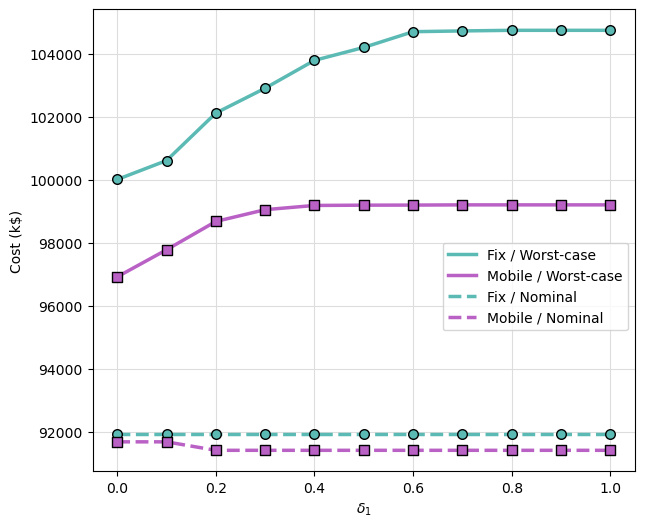

In [6]:
colors = {1: "#5cbab4", 4: "goldenrod", 6: "limegreen", 8: "blue", 10: "red"}
fidx = 1
plt.figure(figsize = (7, 6))
fig_data = pd.DataFrame()
#plt.subplot(1, 2, 1)
for mobile_mode in ["Fix", "Mob"]:
    k = 1
    k_part_df = result_slices[(k, mobile_mode)].query("FI_temp == 1.0")
    marker = "o" if mobile_mode == "Fix" else "s"
    color = "#5cbab4" if mobile_mode == "Fix" else "#b961c5"
    plt.plot(k_part_df["FI_spac"], k_part_df["worst_case"], color = color, lw = 2.5, label = f"{'Fix / Worst-case' if mobile_mode == 'Fix' else 'Mobile / Worst-case'}")
    plt.scatter(k_part_df["FI_spac"], k_part_df["worst_case"], color = color, edgecolor = "black", zorder = 2, marker = marker, s = 48)
    fig_data["delta_1"] = k_part_df["FI_temp"].reset_index(drop = True)
    fig_data[f"{mobile_mode}_worst"] = k_part_df["worst_case"].reset_index(drop = True)
# plt.legend()
# plt.title(f"(a)")
# plt.xlabel("$\delta_1$")
# plt.ylabel("Worst-case cost (k\$)")
plt.grid(color = "#dddddd")

#plt.subplot(1, 2, 2)
for mobile_mode in ["Fix", "Mob"]:
    k = 1
    k_part_df = result_slices[(k, mobile_mode)].query("FI_temp == 1.0")
    # line_alpha = 1
    marker = "o" if mobile_mode == "Fix" else "s"
    color = "#5cbab4" if mobile_mode == "Fix" else "#b961c5"
    plt.plot(k_part_df["FI_spac"], k_part_df["nominal_case"], color = color, lw = 2.5, linestyle = "--", label = f"{'Fix / Nominal' if mobile_mode == 'Fix' else 'Mobile / Nominal'}")
    plt.scatter(k_part_df["FI_spac"], k_part_df["nominal_case"], color = color, edgecolor = "black", zorder = 2, marker = marker, s = 48)
    fig_data[f"{mobile_mode}_nominal"] = k_part_df["worst_case"].reset_index(drop = True)
plt.legend(bbox_to_anchor = (1, 0.4), loc = "center right")
# plt.title(f"(b)")
plt.xlabel("$\delta_1$")
plt.ylabel("Cost (k\$)")
plt.grid(color = "#dddddd")

if write_fig:
    if not os.path.exists(f"./figures/"):
        os.makedirs(f"./figures/")

    plt.savefig(f"./figures/rw_FI1_worst_nominal.png")

In [7]:
print(fig_data.to_csv())

,delta_1,Fix_worst,Mob_worst,Fix_nominal,Mob_nominal
0,1.0,100003.69917713838,96911.21647677373,100003.69917713838,96911.21647677373
1,1.0,100604.02020279127,97770.72536986569,100604.02020279127,97770.72536986569
2,1.0,102113.2695687605,98670.39825030594,102113.2695687605,98670.39825030594
3,1.0,102902.78210418762,99044.83473966038,102902.78210418762,99044.83473966038
4,1.0,103786.61426735135,99179.20483768862,103786.61426735135,99179.20483768862
5,1.0,104197.8082632376,99188.0376231026,104197.8082632376,99188.0376231026
6,1.0,104697.46407152733,99190.67865939332,104697.46407152733,99190.67865939332
7,1.0,104721.81289522248,99197.4382965725,104721.81289522248,99197.4382965725
8,1.0,104740.90546980553,99197.48040652658,104740.90546980553,99197.48040652658
9,1.0,104740.90546980553,99197.48040652658,104740.90546980553,99197.48040652658
10,1.0,104740.90546980553,99197.48040652658,104740.90546980553,99197.48040652658



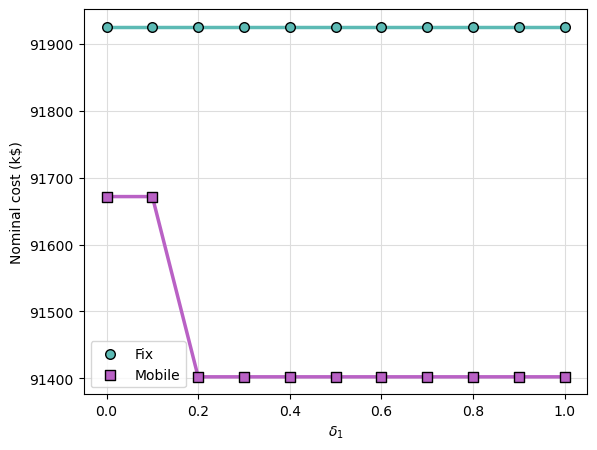

In [15]:
colors = {1: "#5cbab4", 4: "goldenrod", 6: "limegreen", 8: "blue", 10: "red"}
fidx = 1
plt.figure(figsize = (6.5, 5))
for mobile_mode in ["Fix", "Mob"]:
    k = 1
    k_part_df = result_slices[(k, mobile_mode)].query("FI_temp == 1.0")
    # line_alpha = 1
    marker = "o" if mobile_mode == "Fix" else "s"
    color = "#5cbab4" if mobile_mode == "Fix" else "#b961c5"
    plt.plot(k_part_df["FI_spac"], k_part_df["nominal_case"], color = color, lw = 2.5)
    plt.scatter(k_part_df["FI_spac"], k_part_df["nominal_case"], color = color, edgecolor = "black", zorder = 2, marker = marker, s = 48, label = f"{'Fix' if mobile_mode == 'Fix' else 'Mobile'}")
plt.legend()
# plt.title(f"Nominal cost for real-world case under different spatial deviation")
plt.xlabel("$\delta_1$")
plt.ylabel("Nominal cost (k\$)")
plt.grid(color = "#dddddd")

if write_fig:
    if not os.path.exists(f"./figures/"):
        os.makedirs(f"./figures/")

    plt.savefig(f"./figures/rw_FI1_nominal.png")

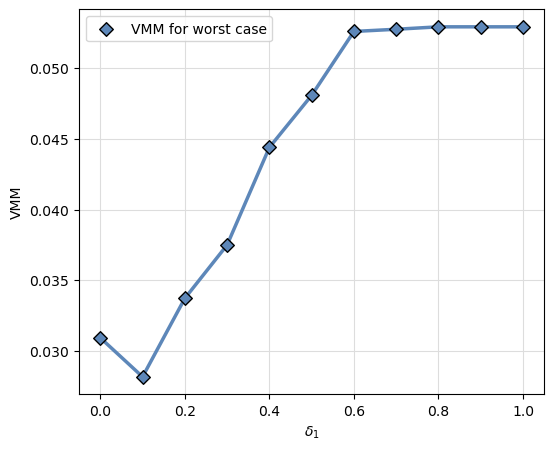

In [19]:
colors = {1: "#5cbab4", 4: "goldenrod", 6: "limegreen", 8: "blue", 10: "red"}
plt.figure(figsize = (6, 5))
k = 1
k_part_df_fix = result_slices[(k, "Fix")].reset_index(drop = True).query("FI_temp == 1.0")
k_part_df_mob = result_slices[(k, "Mob")].reset_index(drop = True).query("FI_temp == 1.0")
k_worst_vmm = (k_part_df_fix["worst_case"] - k_part_df_mob["worst_case"]) / k_part_df_fix["worst_case"]
line_alpha = 1
plt.plot(k_part_df_fix["FI_spac"], k_worst_vmm, color = "#5d87b9", alpha = line_alpha, lw = 2.5)
plt.scatter(k_part_df_fix["FI_spac"], k_worst_vmm, color = "#5d87b9", edgecolor = "black", zorder = 2, marker = "D", s = 48, label = "VMM for worst case")
# plt.title(f"VMM for real-world worst case under spatial deviation")
plt.xlabel("$\delta_1$")
plt.ylabel("VMM")
plt.grid(color = "#dddddd")
plt.legend()

if write_fig:
    plt.savefig(f"./figures/rw_worst_VMM_FI1.png")

fig_data = pd.DataFrame()
fig_data["delta1"] = k_part_df_fix["FI_spac"].reset_index(drop = True)
fig_data["VMM%"] = k_worst_vmm.reset_index(drop = True) * 100

In [20]:
print(fig_data.to_csv())

,delta1,VMM%
0,0.0,3.092368308183159
1,0.1,2.8162839091463847
2,0.2,3.3716199011101295
3,0.3,3.749118620156567
4,0.4,4.439309888069164
5,0.5,4.807942435294501
6,0.6,5.259712315832096
7,0.7,5.275285488207981
8,0.8,5.2925120691046486
9,0.9,5.2925120691046486
10,1.0,5.2925120691046486



In [7]:
### Read map data for Minnesota
### Refer to https://jcutrer.com/python/learn-geopandas-plotting-usmaps for this part
states = geopandas.read_file("../../../geodata/cb_2018_us_state_500k/cb_2018_us_state_500k.shp")
states = states.to_crs("EPSG:4326")

counties = geopandas.read_file("../../../geodata/cb_2018_us_county_500k/cb_2018_us_county_500k.shp")
counties = counties.to_crs("EPSG:4326")

mn_state = states.query("NAME == 'Minnesota'")
mn_state_bound = mn_state.boundary
mn_counties = counties.query("STATEFP == '27'").boundary

In [21]:
FI1 = 1.0
FI2 = 1.0

k = 1
k2 = 1
mobile_mode = "Mob"

def rebuild_matrix(data_df):
    dimensions = []
    cols = data_df.columns
    for col in cols:
        if col == "value": break
        dimensions.append(data_df[col].max())

    result = np.zeros(dimensions)
    for _, row in data_df.iterrows():
        row_list = row.values.flatten().tolist()
        value = row_list.pop(-1)
        for i in range(len(row_list)):
            row_list[i] = int(row_list[i]) - 1
        result[tuple(row_list)] = value

    return result

iloc_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_iloc.csv")
iloc_mat = rebuild_matrix(iloc_df)
jloc_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_jloc.csv")
jloc_mat = rebuild_matrix(jloc_df)
input_d_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_d.csv")
input_d_mat = rebuild_matrix(input_d_df)
input_c_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_c.csv")
input_c_mat = rebuild_matrix(input_c_df)
input_g_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_g.csv")
input_g_mat = rebuild_matrix(input_g_df)

ujmap_df = pd.read_csv(f"./Variable_result/Set1_result_uncertain_j_list_{mobile_mode}_FI1={FI1}_FI2=1.0.csv")
u_worst_df = pd.read_csv(f"./Variable_result/Set1_result_worst_case_{mobile_mode}_FI1={FI1}_FI2=1.0.csv")
x_design_df = pd.read_csv(f"./Variable_result/Set1_result_x_design_{mobile_mode}_FI1={FI1}_FI2=1.0.csv")
y_config_df = pd.read_csv(f"./Variable_result/Set1_result_y_config_{mobile_mode}_FI1={FI1}_FI2=1.0.csv")
y_flow_df = pd.read_csv(f"./Variable_result/Set1_result_y_flow_{mobile_mode}_FI1={FI1}_FI2=1.0.csv")

ujmap_mat = rebuild_matrix(ujmap_df) - 1 # Julia indexes start from 1, while Python indexes start from 0
u_worst_mat = rebuild_matrix(u_worst_df)
x_design_mat = rebuild_matrix(x_design_df)
y_config_mat = rebuild_matrix(y_config_df)
y_flow_mat = rebuild_matrix(y_flow_df)

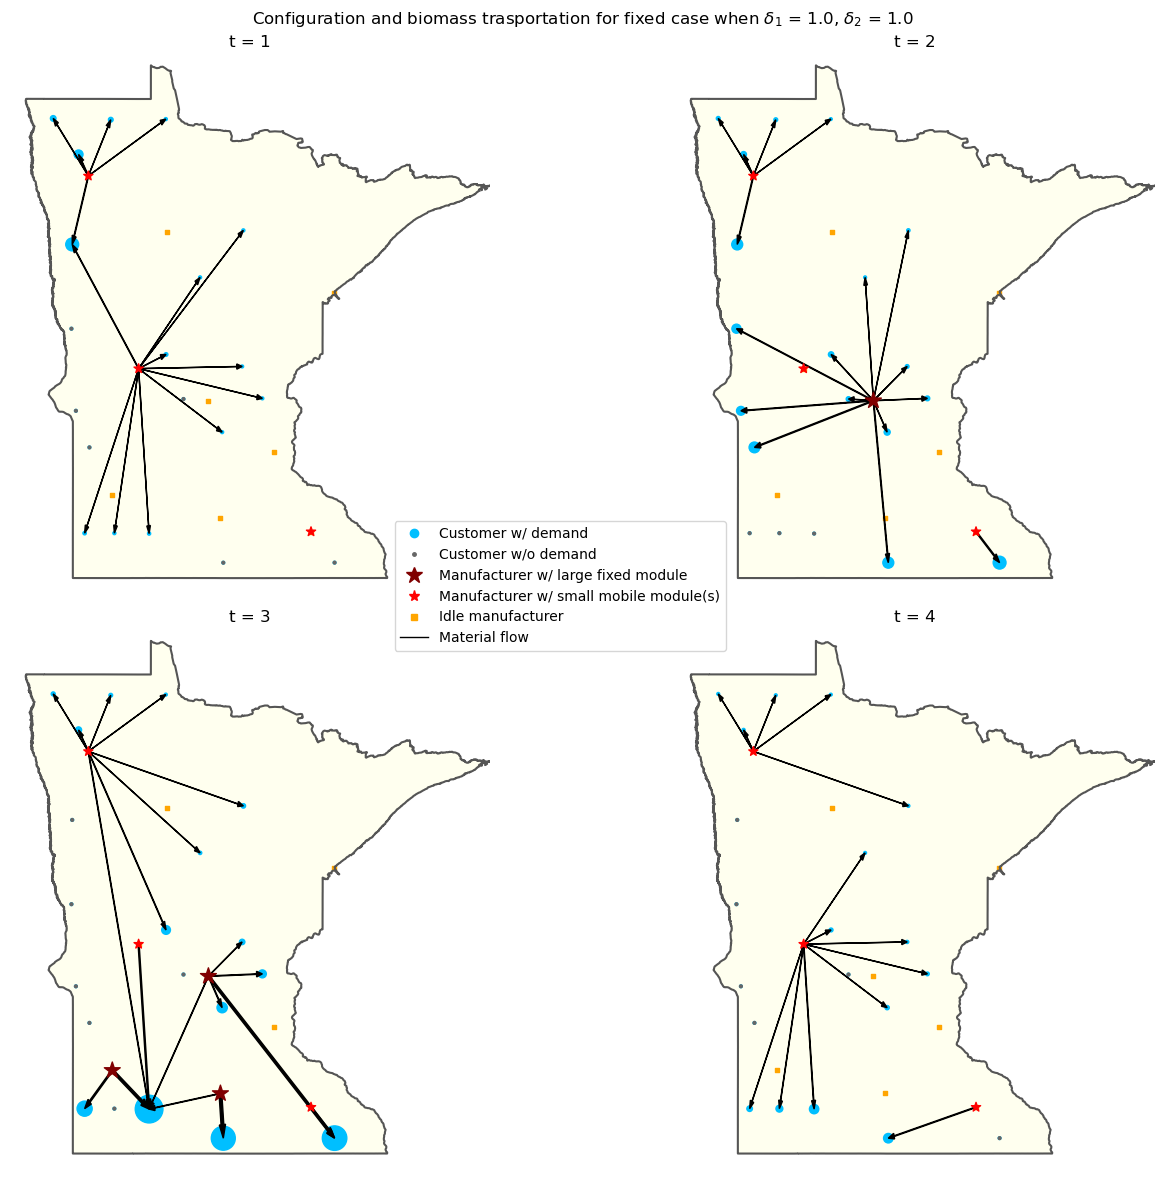

In [19]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

I_SIZE, J_SIZE, L_SIZE, T_SIZE = y_flow_mat.shape
UI = ujmap_mat.shape[0]
j_to_uj_dict = {}

for t in range(T_SIZE):
    j_to_uj_dict[t] = {}
    for uj in range(UI):
        j_to_uj_dict[t][int(ujmap_mat[uj, t])] = uj

fig, ax = plt.subplots(2, 2, figsize = (15, 12))
ax = ax.reshape(4)
plt.suptitle(f"Configuration and biomass trasportation for {'mobile' if mobile_mode == 'Mob' else 'fixed'} case when $\delta_1$ = {FI1}, $\delta_2$ = {FI2}")
for t in range(T_SIZE):
    ax_t = ax[t]
    ax_t.set(xlim = (-97.5, -89.5), ylim = (43.3, 49.5))
    ax_t.set_aspect("equal")
    ax_t.set_title(f"t = {t + 1}")
    ax_t.set_xlabel("Longitude")
    ax_t.set_ylabel("Latitude")
    ax_t.get_xaxis().set_visible(False)
    ax_t.get_yaxis().set_visible(False)
    for spine in ax_t.spines.values():
        spine.set_visible(False)

    mn_state.plot(color = "#ffffef", ax = ax_t)
    mn_state_bound.plot(color = "#555555", ax = ax_t)
    real_demand = np.zeros(J_SIZE)
    manufacturer_config = np.ones(I_SIZE).astype(np.int64) * 4
    for j in range(J_SIZE):
        if j in ujmap_mat[:, t]:
            real_demand[j] = u_worst_mat[j_to_uj_dict[t][j], t]
        else:
            real_demand[j] = input_d_mat[j, t]
    # print(real_demand)
    ax_t.scatter(jloc_mat[:, 1], jloc_mat[:, 0], c = "deepskyblue", s = (real_demand > 0) * (real_demand / 270) + 4, label = "Customers with demand")
    ax_t.scatter(jloc_mat[:, 1], jloc_mat[:, 0], c = "#666666", s = (real_demand == 0) * 4, label = "Customers without demand")

    config_size = np.array([6, 12, 18, 18, 0]) * 8
    color = ["red", "red", "red", "maroon", "white"]
    
    ax_t.scatter(iloc_mat[:, 1], iloc_mat[:, 0], color = "orange", marker = "s", s = 6)
    for i in range(I_SIZE):
        for l in range(L_SIZE):
            if y_config_mat[i, l, t] > 0.05:
                manufacturer_config[i] = l

    for i in range(I_SIZE):
        for j in range(J_SIZE):
            amount = sum(y_flow_mat[i, j, :, t])
            if amount > 0.01:
                ax_t.arrow(iloc_mat[i, 1], iloc_mat[i, 0], jloc_mat[j, 1] - iloc_mat[i, 1], jloc_mat[j, 0] - iloc_mat[i, 0], 
                          length_includes_head = True, 
                          width = 0.002 + amount / 1.8e6,
                          head_width = 0.06 + amount / 1.8e6,
                          linewidth = None,
                          color = "black",
                          alpha = 1.0)
    ax_t.scatter(iloc_mat[:, 1], iloc_mat[:, 0], color = [color[manufacturer_config[i]] for i in range(I_SIZE)], s = [config_size[manufacturer_config[i]] for i in range(I_SIZE)], marker = "*")
    # ax_t.legend()

fig.tight_layout()
legend_elements = [
    Line2D([0], [0], marker = 'o', color = "deepskyblue", markersize = 6, label = "Customer w/ demand", lw = 0),
    Line2D([0], [0], marker = 'o', color = "#666666", markersize = 2.5, label = "Customer w/o demand", lw = 0),
    Line2D([0], [0], marker = '*', color = "maroon", markersize = 12, label = "Manufacturer w/ large fixed module", lw = 0),
    Line2D([0], [0], marker = '*', color = "red", markersize = 8, label = "Manufacturer w/ small mobile module(s)", lw = 0),
    Line2D([0], [0], marker = 's', color = "orange", markersize = 4, label = "Idle manufacturer", lw = 0),
    Line2D([0], [0], color = "k", lw = 1, label = "Material flow")
]

fig.legend(handles = legend_elements, loc = "center", bbox_to_anchor = (0.485, 0.5))
plt.savefig(f"./figures/rw_flow_plot_FI1={FI1}_FI2={FI2}_{mobile_mode}.png", bbox_inches = "tight")

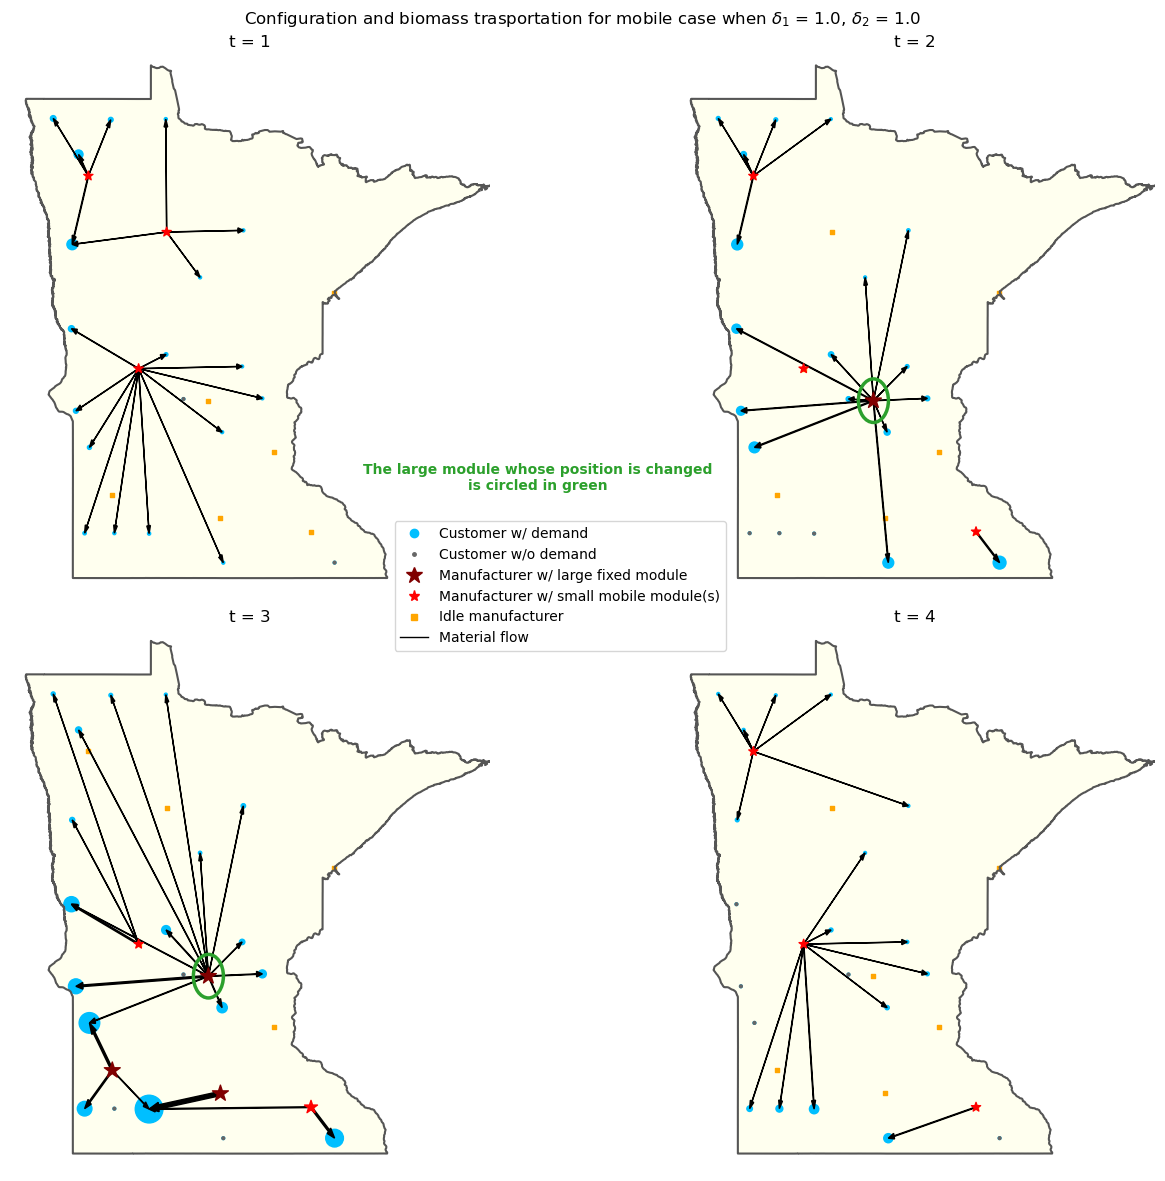

In [22]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

I_SIZE, J_SIZE, L_SIZE, T_SIZE = y_flow_mat.shape
UI = ujmap_mat.shape[0]
j_to_uj_dict = {}

for t in range(T_SIZE):
    j_to_uj_dict[t] = {}
    for uj in range(UI):
        j_to_uj_dict[t][int(ujmap_mat[uj, t])] = uj

fig, ax = plt.subplots(2, 2, figsize = (15, 12))
ax = ax.reshape(4)
plt.suptitle(f"Configuration and biomass trasportation for {'mobile' if mobile_mode == 'Mob' else 'fixed'} case when $\delta_1$ = {FI1}, $\delta_2$ = {FI2}")
for t in range(T_SIZE):
    ax_t = ax[t]
    ax_t.set(xlim = (-97.5, -89.5), ylim = (43.3, 49.5))
    ax_t.set_aspect("equal")
    ax_t.set_title(f"t = {t + 1}")
    ax_t.set_xlabel("Longitude")
    ax_t.set_ylabel("Latitude")
    ax_t.get_xaxis().set_visible(False)
    ax_t.get_yaxis().set_visible(False)
    for spine in ax_t.spines.values():
        spine.set_visible(False)

    mn_state.plot(color = "#ffffef", ax = ax_t)
    mn_state_bound.plot(color = "#555555", ax = ax_t)
    real_demand = np.zeros(J_SIZE)
    manufacturer_config = np.ones(I_SIZE).astype(np.int64) * 4
    for j in range(J_SIZE):
        if j in ujmap_mat[:, t]:
            real_demand[j] = u_worst_mat[j_to_uj_dict[t][j], t]
        else:
            real_demand[j] = input_d_mat[j, t]
    # print(real_demand)
    ax_t.scatter(jloc_mat[:, 1], jloc_mat[:, 0], c = "deepskyblue", s = (real_demand > 0) * (real_demand / 270) + 4, label = "Customers with demand")
    ax_t.scatter(jloc_mat[:, 1], jloc_mat[:, 0], c = "#666666", s = (real_demand == 0) * 4, label = "Customers without demand")

    config_size = np.array([6, 12, 18, 18, 0]) * 8
    color = ["red", "red", "red", "maroon", "white"]
    
    ax_t.scatter(iloc_mat[:, 1], iloc_mat[:, 0], color = "orange", marker = "s", s = 6)
    for i in range(I_SIZE):
        for l in range(L_SIZE):
            if y_config_mat[i, l, t] > 0.05:
                manufacturer_config[i] = l

    for i in range(I_SIZE):
        for j in range(J_SIZE):
            amount = sum(y_flow_mat[i, j, :, t])
            if amount > 0.01:
                ax_t.arrow(iloc_mat[i, 1], iloc_mat[i, 0], jloc_mat[j, 1] - iloc_mat[i, 1], jloc_mat[j, 0] - iloc_mat[i, 0], 
                          length_includes_head = True, 
                          width = 0.002 + amount / 1.8e6,
                          head_width = 0.06 + amount / 1.8e6,
                          linewidth = None,
                          color = "black",
                          alpha = 1.0)
    ax_t.scatter(iloc_mat[:, 1], iloc_mat[:, 0], color = [color[manufacturer_config[i]] for i in range(I_SIZE)], s = [config_size[manufacturer_config[i]] for i in range(I_SIZE)], marker = "*")
    # ax_t.legend()

    if t == 1 or t == 2:
        uncolored_circle = plt.Circle((iloc_mat[4, 1], iloc_mat[4, 0]), 0.25, lw = 2.5, edgecolor = "tab:green", fill = False)
        ax_t.add_artist(uncolored_circle)

fig.tight_layout()
legend_elements = [
    Line2D([0], [0], marker = 'o', color = "deepskyblue", markersize = 6, label = "Customer w/ demand", lw = 0),
    Line2D([0], [0], marker = 'o', color = "#666666", markersize = 2.5, label = "Customer w/o demand", lw = 0),
    Line2D([0], [0], marker = '*', color = "maroon", markersize = 12, label = "Manufacturer w/ large fixed module", lw = 0),
    Line2D([0], [0], marker = '*', color = "red", markersize = 8, label = "Manufacturer w/ small mobile module(s)", lw = 0),
    Line2D([0], [0], marker = 's', color = "orange", markersize = 4, label = "Idle manufacturer", lw = 0),
    Line2D([0], [0], color = "k", lw = 1, label = "Material flow")
]

fig.legend(handles = legend_elements, loc = "center", bbox_to_anchor = (0.485, 0.5))
fig.text(0.47, 0.58, "The large module whose position is changed\nis circled in green", color = "tab:green", ha = "center", weight = "bold", fontsize = 10)
plt.savefig(f"./figures/rw_flow_plot_FI1={FI1}_FI2={FI2}_{mobile_mode}_hl.png", bbox_inches = "tight")

### Set 2 (temporal deviation, non-parallel method)

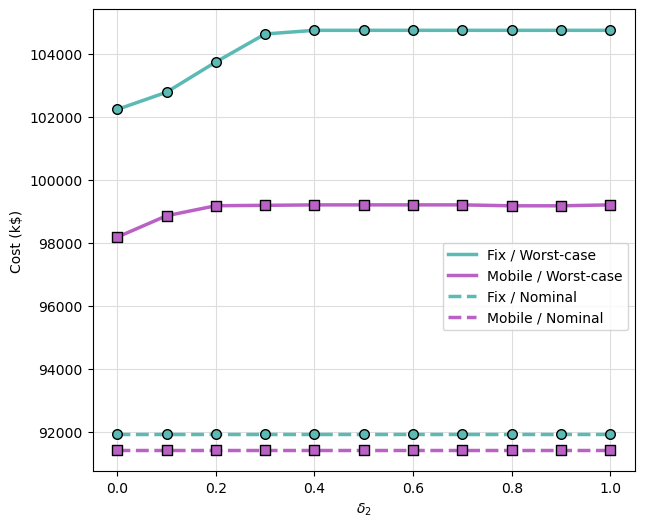

In [8]:
colors = {1: "#5cbab4", 4: "goldenrod", 6: "limegreen", 8: "blue", 10: "red"}
fidx = 1
plt.figure(figsize = (7, 6))

fig_data = pd.DataFrame()
# plt.subplot(121)
for mobile_mode in ["Fix", "Mob"]:
    k = 1
    k_part_df = result_slices[(k, mobile_mode)].query("FI_spac == 1.0")
    marker = "o" if mobile_mode == "Fix" else "s"
    color = "#5cbab4" if mobile_mode == "Fix" else "#b961c5"
    plt.plot(k_part_df["FI_temp"], k_part_df["worst_case"], color = color, lw = 2.5, label = f"{'Fix / Worst-case' if mobile_mode == 'Fix' else 'Mobile / Worst-case'}")
    plt.scatter(k_part_df["FI_temp"], k_part_df["worst_case"], color = color, marker = marker, s = 48, edgecolor = "black", zorder = 2)
    fig_data["delta_2"] = k_part_df["FI_temp"].reset_index(drop = True)
    fig_data[f"{mobile_mode}_worst"] = k_part_df["worst_case"].reset_index(drop = True)
# plt.legend()
# plt.title(f"(a)")
# plt.xlabel("$\delta_2$")
# plt.ylabel("Worst-case cost (k\$)")
# plt.grid(color = "#dddddd")

# plt.subplot(122)
for mobile_mode in ["Fix", "Mob"]:
    k = 1
    k_part_df = result_slices[(k, mobile_mode)].query("FI_spac == 1.0")
    marker = "o" if mobile_mode == "Fix" else "s"
    color = "#5cbab4" if mobile_mode == "Fix" else "#b961c5"
    plt.plot(k_part_df["FI_temp"], k_part_df["nominal_case"], color = color, lw = 2.5, linestyle = "--", label = f"{'Fix / Nominal' if mobile_mode == 'Fix' else 'Mobile / Nominal'}")
    plt.scatter(k_part_df["FI_temp"], k_part_df["nominal_case"], color = color, marker = marker, s = 48, edgecolor = "black", zorder = 2)
    fig_data[f"{mobile_mode}_nominal"] = k_part_df["nominal_case"].reset_index(drop = True)
plt.legend(bbox_to_anchor = (1, 0.4), loc = "center right")
# plt.title(f"(b)")
plt.xlabel("$\delta_2$")
plt.ylabel("Cost (k\$)")
plt.grid(color = "#dddddd")

if write_fig:
    if not os.path.exists(f"./figures/"):
        os.makedirs(f"./figures/")

    plt.savefig(f"./figures/rw_FI2_worst_nominal.png")

In [9]:
print(fig_data.to_csv())

,delta_2,Fix_worst,Mob_worst,Fix_nominal,Mob_nominal
0,0.0,102227.35845309052,98172.4099916546,91925.74796119476,91402.3017917109
1,0.1,102775.01493254112,98851.15074246856,91925.74796119396,91402.3017917109
2,0.2,103734.14419643376,99170.11261191624,91925.74796119476,91402.3017917109
3,0.3,104624.63405443545,99183.02578813642,91925.74796119476,91402.3017917109
4,0.4,104740.90546980553,99196.70093172854,91925.74796119476,91402.3017917109
5,0.5,104740.90546980553,99197.40795904984,91925.74796119476,91402.3017917109
6,0.6,104740.90546980553,99197.48040652656,91925.74796119476,91402.3017917109
7,0.7,104740.90546980553,99197.48040652658,91925.74796119476,91402.3017917109
8,0.8,104740.90546980553,99167.92492742432,91925.74796119476,91402.3017917109
9,0.9,104740.90546980553,99167.92492742432,91925.74796119476,91402.3017917109
10,1.0,104740.90546980553,99197.48040652658,91925.74796119476,91402.3017917109



In [13]:
colors = {1: "#5cbab4", 4: "goldenrod", 6: "limegreen", 8: "blue", 10: "red"}
fidx = 1
plt.figure(figsize = (6.5, 5))


if write_fig:
    if not os.path.exists(f"./figures/"):
        os.makedirs(f"./figures/")

    plt.savefig(f"./figures/rw_FI2_nominal.png")

<Figure size 650x500 with 0 Axes>

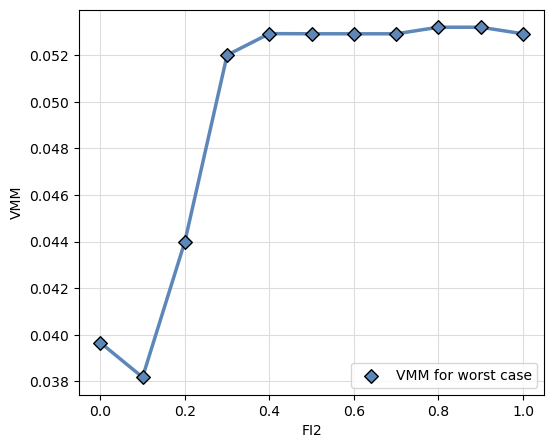

In [26]:
colors = {1: "#5cbab4", 4: "goldenrod", 6: "limegreen", 8: "blue", 10: "red"}
plt.figure(figsize = (6, 5))
k = 1
k_part_df_fix = result_slices[(k, "Fix")].reset_index(drop = True).query("FI_spac == 1.0")
k_part_df_mob = result_slices[(k, "Mob")].reset_index(drop = True).query("FI_spac == 1.0")
k_worst_vmm = (k_part_df_fix["worst_case"] - k_part_df_mob["worst_case"]) / k_part_df_fix["worst_case"]
line_alpha = 1
plt.plot(k_part_df["FI_temp"], k_worst_vmm, color = "#5d87b9", label = None, lw = 2.5)
plt.scatter(k_part_df["FI_temp"], k_worst_vmm, color = "#5d87b9", edgecolor = "black", marker = "D", s = 48, label = "VMM for worst case", zorder = 2)
plt.legend()
# plt.title(f"VMM for worst case under temporal deviation")
plt.xlabel("FI2")
plt.ylabel("VMM")
plt.grid(color = "#dddddd")

if write_fig:
    plt.savefig(f"./figures/rw_worst_VMM_FI2.png")

fig_data = pd.DataFrame()
fig_data["delta2"] = k_part_df_fix["FI_temp"].reset_index(drop = True)
fig_data["VMM%"] = k_worst_vmm.reset_index(drop = True) * 100

In [27]:
print(fig_data.to_csv())

,delta2,VMM%
0,0.0,3.966598103282337
1,0.1,3.817916438784356
2,0.2,4.399738986495081
3,0.3,5.201077466581908
4,0.4,5.293256262401948
5,0.5,5.292581237378886
6,0.6,5.292512069104662
7,0.7,5.2925120691046486
8,0.8,5.32072977351506
9,0.9,5.32072977351506
10,1.0,5.2925120691046486



In [113]:
FI1 = 1.0
FI2 = 1.0

k = 1
k2 = 1
mobile_mode = "Mob"

iloc_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_iloc.csv")
iloc_mat = rebuild_matrix(iloc_df)
jloc_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_jloc.csv")
jloc_mat = rebuild_matrix(jloc_df)
input_d_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_d.csv")
input_d_mat = rebuild_matrix(input_d_df)
input_c_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_c.csv")
input_c_mat = rebuild_matrix(input_c_df)
input_g_df = pd.read_csv(f"../{setName}_{k}_{k2}/input_g.csv")
input_g_mat = rebuild_matrix(input_g_df)

ujmap_df = pd.read_csv(f"./Variable_result/Set1_result_uncertain_j_list_{mobile_mode}_FI1=1.0_FI2={FI2}.csv")
u_worst_df = pd.read_csv(f"./Variable_result/Set1_result_worst_case_{mobile_mode}_FI1=1.0_FI2={FI2}.csv")
x_design_df = pd.read_csv(f"./Variable_result/Set1_result_x_design_{mobile_mode}_FI1=1.0_FI2={FI2}.csv")
y_config_df = pd.read_csv(f"./Variable_result/Set1_result_y_config_{mobile_mode}_FI1=1.0_FI2={FI2}.csv")
y_flow_df = pd.read_csv(f"./Variable_result/Set1_result_y_flow_{mobile_mode}_FI1=1.0_FI2={FI2}.csv")

ujmap_mat = rebuild_matrix(ujmap_df) - 1 # Julia indexes start from 1, while Python indexes start from 0
u_worst_mat = rebuild_matrix(u_worst_df)
x_design_mat = rebuild_matrix(x_design_df)
y_config_mat = rebuild_matrix(y_config_df)
y_flow_mat = rebuild_matrix(y_flow_df)

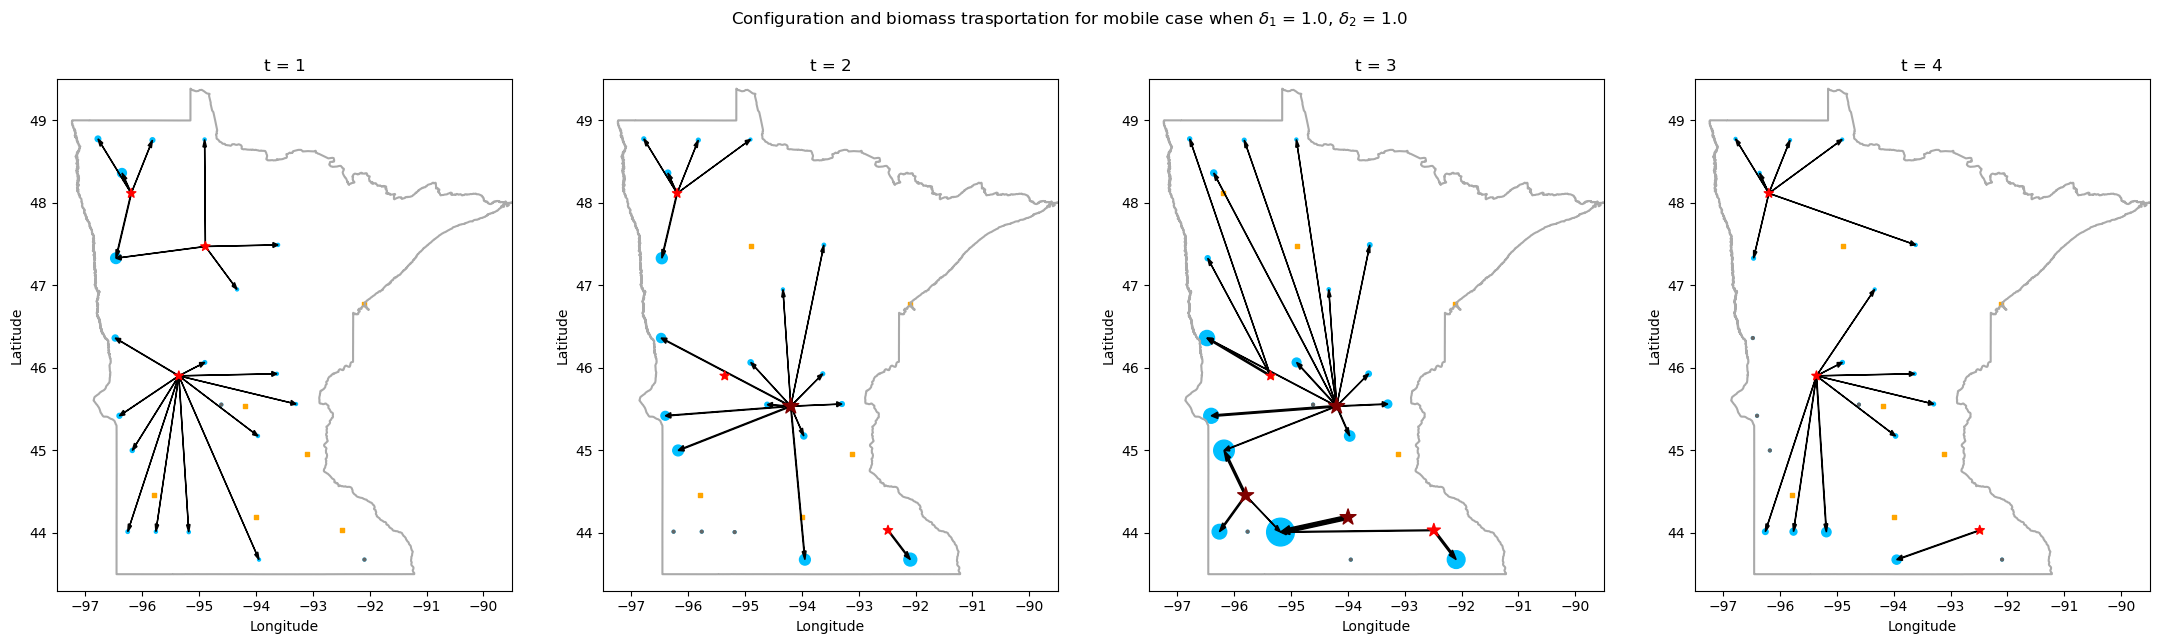

In [ ]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

I_SIZE, J_SIZE, L_SIZE, T_SIZE = y_flow_mat.shape
UI = ujmap_mat.shape[0]
j_to_uj_dict = {}

for t in range(T_SIZE):
    j_to_uj_dict[t] = {}
    for uj in range(UI):
        j_to_uj_dict[t][int(ujmap_mat[uj, t])] = uj

fig, ax = plt.subplots(2, 2, figsize = (16.5, 12))
ax = ax.reshape(4)
plt.suptitle(f"Configuration and biomass trasportation for {'mobile' if mobile_mode == 'Mob' else 'fixed'} case when $\delta_1$ = {FI1}, $\delta_2$ = {FI2}")
for t in range(T_SIZE):
    ax_t = ax[t]
    ax_t.set(xlim = (-97.5, -89.5), ylim = (43.3, 49.5))
    ax_t.set_aspect("equal")
    ax_t.set_title(f"t = {t + 1}")
    ax_t.set_xlabel("Longitude")
    ax_t.set_ylabel("Latitude")
    ax_t.get_xaxis().set_visible(False)
    ax_t.get_yaxis().set_visible(False)
    for spine in ax_t.spines.values():
        spine.set_visible(False)

    mn_state.plot(color = "#999999", ax = ax_t)
    real_demand = np.zeros(J_SIZE)
    manufacturer_config = np.ones(I_SIZE).astype(np.int64) * 4
    for j in range(J_SIZE):
        if j in ujmap_mat[:, t]:
            real_demand[j] = u_worst_mat[j_to_uj_dict[t][j], t]
        else:
            real_demand[j] = input_d_mat[j, t]
    # print(real_demand)
    ax_t.scatter(jloc_mat[:, 1], jloc_mat[:, 0], c = "deepskyblue", s = (real_demand > 0) * (real_demand / 270) + 4, label = "Customers with demand")
    ax_t.scatter(jloc_mat[:, 1], jloc_mat[:, 0], c = "#666666", s = (real_demand == 0) * 4, label = "Customers without demand")

    config_size = np.array([6, 12, 18, 18, 0]) * 8
    color = ["red", "red", "red", "maroon", "white"]
    
    ax_t.scatter(iloc_mat[:, 1], iloc_mat[:, 0], color = "orange", marker = "s", s = 6)
    for i in range(I_SIZE):
        for l in range(L_SIZE):
            if y_config_mat[i, l, t] > 0.05:
                manufacturer_config[i] = l

    for i in range(I_SIZE):
        for j in range(J_SIZE):
            amount = sum(y_flow_mat[i, j, :, t])
            if amount > 0.01:
                ax_t.arrow(iloc_mat[i, 1], iloc_mat[i, 0], jloc_mat[j, 1] - iloc_mat[i, 1], jloc_mat[j, 0] - iloc_mat[i, 0], 
                          length_includes_head = True, 
                          width = 0.002 + amount / 1.8e6,
                          head_width = 0.06 + amount / 1.8e6,
                          linewidth = None,
                          color = "black",
                          alpha = 1.0)
    ax_t.scatter(iloc_mat[:, 1], iloc_mat[:, 0], color = [color[manufacturer_config[i]] for i in range(I_SIZE)], s = [config_size[manufacturer_config[i]] for i in range(I_SIZE)], marker = "*")
    # ax_t.legend()

fig.tight_layout()
legend_elements = [
    Line2D([0], [0], marker = 'o', color = "deepskyblue", markersize = 6, label = "Customer w/ demand", lw = 0),
    Line2D([0], [0], marker = 'o', color = "#666666", markersize = 2.5, label = "Customer w/o demand", lw = 0),
    Line2D([0], [0], marker = '*', color = "maroon", markersize = 12, label = "Manufacturer w/ large fixed module", lw = 0),
    Line2D([0], [0], marker = '*', color = "red", markersize = 8, label = "Manufacturer w/ small mobile module(s)", lw = 0),
    Line2D([0], [0], marker = 's', color = "orange", markersize = 4, label = "Idle manufacturer", lw = 0),
    Line2D([0], [0], color = "k", lw = 1, label = "Material flow")
]

fig.legend(handles = legend_elements, loc = "center", bbox_to_anchor = (0.485, 0.5))
plt.savefig(f"./figures/rw_flow_plot_FI1={FI1}_FI2={FI2}_{mobile_mode}.png")

In [11]:
vmm_images = {}
design_list = {}
design_hash = {}
design_hash_set = {}


for i in range(11):
    for j in range(11):
        x_design_fix = pd.read_csv(f"./Variable_result/Set1_result_x_design_Fix_FI1={i / 10:.1f}_FI2={j / 10:.1f}.csv")
        x_design_mobile = pd.read_csv(f"./Variable_result/Set1_result_x_design_Mob_FI1={i / 10:.1f}_FI2={j / 10:.1f}.csv")

        x_design_fix = x_design_fix.query("m == 2")["value"].tolist() + [x_design_fix.query("m == 1")["value"].sum()]
        x_design_mobile = x_design_mobile.query("m == 2")["value"].tolist() + [x_design_mobile.query("m == 1")["value"].sum()]
        # print(x_design_mobile)
        h = hash(tuple(x_design_fix + x_design_mobile))
        design_list[(i, j)] = x_design_fix + x_design_mobile
        design_hash[(i, j)] = h
        design_hash_set[h] = design_hash_set.get(h, 0) + 1

for k in range(1, 2):
    k_part_df_fix = result_slices[(k, "Fix")].reset_index(drop = True).rename(columns = {"worst_case": "worst_fix", "nominal_case": "nominal_fix"})
    k_part_df_mob = result_slices[(k, "Mob")].reset_index(drop = True).rename(columns = {"worst_case": "worst_mob", "nominal_case": "nominal_mob"})
    k_join_df = k_part_df_fix.merge(k_part_df_mob[["FI_spac", "FI_temp", "worst_mob", "nominal_mob"]], on = ["FI_spac", "FI_temp"])
    k_join_df["VMM_worst"] = (k_join_df["worst_fix"] - k_join_df["worst_mob"]) / k_join_df["worst_fix"]
    
    vmm_images[k] = np.zeros((11, 11))
    for i in range(11):
        for j in range(11):
            vmm_images[k][i, j] = k_join_df.query(f"FI_spac == {i / 10.0} & FI_temp == {j / 10.0}").reset_index(drop = True)["VMM_worst"][0]

In [128]:
design_list[(2, 1)]

[0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 3.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 6.0]

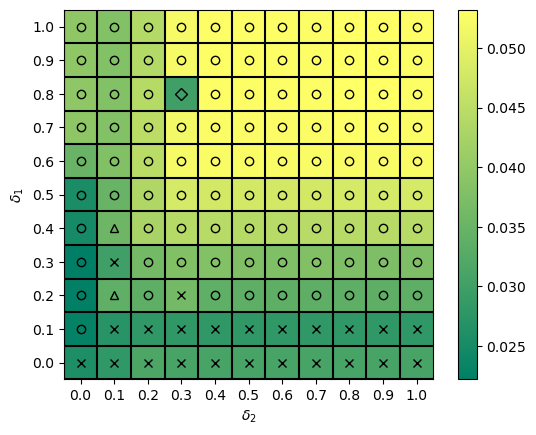

In [12]:
design_num = {}
for (i, v) in enumerate(design_hash_set):
    design_num[v] = i + 1

ax = plt.gca()
k = 1

def getMarker(d):
    if d == 2: return "o"
    elif d == 1: return "x"
    elif d == 3: return "^"
    else: return "D"

plt.imshow(vmm_images[k], cmap = "summer")
# plt.title(f"VMM for real-world case")
plt.xticks(ticks = list(range(11)), labels = [str(i / 10.0) for i in range(11)])
plt.yticks(ticks = list(range(11)), labels = [str(i / 10.0) for i in range(11)])
plt.xlabel("$\delta_2$")
plt.ylabel("$\delta_1$")
for i in range(11):
    for j in range(11):
        # color = "black" if vmm_images[k][j, i] > np.quantile(vmm_images[k], 0.25) else "white"
        plt.plot(i, j, marker = getMarker(design_num[design_hash[j, i]]), fillstyle = "none", color = "k")
        # plt.text(i, j, f"{design_num[design_hash[j, i]]}", va = "center", ha = "center", fontdict = {"fontsize": 7}, color = color)
plt.colorbar()

for i in range(11):
    plt.axhline(y = i - 0.5, color = "k")
    plt.axvline(x = i - 0.5, color = "k")

# plt.grid()
ax.invert_yaxis()
plt.savefig("./figures/rw_VMM_heatmap.png")


In [14]:
fig_data = pd.DataFrame(columns = ["delta1", "delta2", "VMM%"])

for i in range(11):
    for j in range(11):
        fig_data = pd.concat([fig_data, pd.DataFrame({"delta1": i / 10, "delta2": j / 10, "VMM%": vmm_images[k][i, j] * 100}, index = [0])], ignore_index = True)

print(fig_data.to_csv())

,delta1,delta2,VMM%
0,0.0,0.0,2.5749712449545186
1,0.0,0.1,2.8174634203440916
2,0.0,0.2,3.16148373777416
3,0.0,0.3,3.092823169927267
4,0.0,0.4,3.092823169927311
5,0.0,0.5,3.092823169927267
6,0.0,0.6,3.092823169927267
7,0.0,0.7,3.0928231699272817
8,0.0,0.8,3.0923683081831883
9,0.0,0.9,3.092368308183159
10,0.0,1.0,3.092368308183159
11,0.1,0.0,2.293435980548263
12,0.1,0.1,2.695645445902837
13,0.1,0.2,2.816283909148135
14,0.1,0.3,2.816283909148135
15,0.1,0.4,2.816283909148135
16,0.1,0.5,2.8162839091481637
17,0.1,0.6,2.816283909148135
18,0.1,0.7,2.8162839091481637
19,0.1,0.8,2.8162839091481637
20,0.1,0.9,2.8162839091481637
21,0.1,1.0,2.8162839091463847
22,0.2,0.0,2.255938477575722
23,0.2,0.1,3.391813652591507
24,0.2,0.2,3.36468626588464
25,0.2,0.3,3.6266968696284922
26,0.2,0.4,3.383755307179416
27,0.2,0.5,3.364094911712804
28,0.2,0.6,3.3716199011101433
29,0.2,0.7,3.3716199011101025
30,0.2,0.8,3.3716199011101162
31,0.2,0.9,3.3716199011101304
32,0.2,1.0,3.3716199011101295
33,0.3,0.0,2.2216052

/tmp/ipykernel_2425262/3619771957.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  fig_data = pd.concat([fig_data, pd.DataFrame({"delta1": i / 10, "delta2": j / 10, "VMM%": vmm_images[k][i, j] * 100}, index = [0])], ignore_index = True)
